# User Rating Data Exploration

This notebook explores the final user data stored in the parquet file located at `data/merged/final_user_data.parquet`. We'll examine the structure of the data and visualize key patterns without loading the entire dataset into memory.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq
import os

# Set up visualization style
plt.style.use('seaborn-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

C:\Users\East-Sound\AppData\Local\Temp\ipykernel_27076\1040802030.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# Define the path to the parquet file
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
parquet_file_path = os.path.join(project_root, 'data', 'interim', 'final_merged_data.parquet')

# Check if file exists
if os.path.exists(parquet_file_path):
    print(f"File found at: {parquet_file_path}")
else:
    print(f"File not found at: {parquet_file_path}")

File found at: d:\FCAI\soft_computing\project\Movie_recomendation_system\neuro-fuzzy-model\data\interim\final_merged_data.parquet


## Examining Parquet File Metadata

Let's first examine the metadata of the parquet file to understand its structure without loading the entire file into memory.

In [3]:
# Examine the parquet file metadata
parquet_file = pq.ParquetFile(parquet_file_path)

# Get basic information
print(f"Number of row groups: {parquet_file.num_row_groups}")
print(f"Total number of rows: {parquet_file.metadata.num_rows}")
print(f"File size: {os.path.getsize(parquet_file_path) / (1024 * 1024):.2f} MB")

# Get schema information
print("\nSchema information:")
print(parquet_file.schema)

Number of row groups: 32
Total number of rows: 32733706
File size: 1149.53 MB

Schema information:
required group field_id=-1 schema {
  optional int64 field_id=-1 userId;
  optional int64 field_id=-1 movieId;
  optional double field_id=-1 rating;
  optional binary field_id=-1 title (String);
  optional binary field_id=-1 genres (String);
  optional binary field_id=-1 imdbId (String);
  optional double field_id=-1 tmdbId;
  optional binary field_id=-1 imdb_id (String);
  optional int64 field_id=-1 budget;
  optional binary field_id=-1 original_language (String);
  optional double field_id=-1 popularity;
  optional binary field_id=-1 release_date (String);
  optional double field_id=-1 revenue;
  optional double field_id=-1 runtime;
  optional double field_id=-1 vote_average;
  optional double field_id=-1 vote_count;
  optional binary field_id=-1 cast (String);
  optional binary field_id=-1 crew (String);
  optional binary field_id=-1 production_companies (String);
}



## Loading a Sample of Data

Now let's load just a sample of the data to examine its contents without loading the entire file into memory.

In [4]:
# Load a larger sample of data using pyarrow's batching capabilities
parquet_file = pq.ParquetFile(parquet_file_path)

# Load multiple batches to get a larger sample
sample_size = 50000  # Increased sample size
sample_data = pd.DataFrame()
num_batches = 0
max_batches = 10  # Limit the number of batches to avoid loading too much

for batch in parquet_file.iter_batches():
    batch_df = batch.to_pandas()
    sample_data = pd.concat([sample_data, batch_df])
    num_batches += 1
    
    print(f"Loaded batch {num_batches} with {len(batch_df)} rows. Total rows so far: {len(sample_data)}")
    
    if len(sample_data) >= sample_size or num_batches >= max_batches:
        # Limit to exact sample size if we've exceeded it
        if len(sample_data) > sample_size:
            sample_data = sample_data.iloc[:sample_size]
        break

print(f"\nLoaded {len(sample_data)} rows in total from {num_batches} batches")

# Display basic information about the sample
print("\nSample data info:")
print(f"Shape: {sample_data.shape}")
print("\nData types:")
print(sample_data.dtypes)

# Display the first few rows of the sample
print("\nFirst 5 rows:")
sample_data.head(100)

Loaded batch 1 with 65536 rows. Total rows so far: 65536

Loaded 50000 rows in total from 1 batches

Sample data info:
Shape: (50000, 19)

Data types:
userId                    int64
movieId                   int64
rating                  float64
title                    object
genres                   object
imdbId                   object
tmdbId                  float64
imdb_id                  object
budget                    int64
original_language        object
popularity              float64
release_date             object
revenue                 float64
runtime                 float64
vote_average            float64
vote_count              float64
cast                     object
crew                     object
production_companies     object
dtype: object

First 5 rows:


,userId,movieId,rating,title,genres,imdbId,tmdbId,imdb_id,budget,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count,cast,crew,production_companies
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,114709,30000000,en,21.946943,1995-10-30,373554033.0,81.0,7.7,5415.0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,Pixar Animation Studios
1,1,110,4.0,Braveheart (1995),Action|Drama|War,112573,197.0,112573,72000000,en,20.755149,1995-05-24,210000000.0,177.0,7.7,3404.0,Mel Gibson|Catherine McCormack|Sophie Marceau|...,Mel Gibson,Icon Entertainment International|The Ladd Comp...
2,1,158,4.0,Casper (1995),Adventure|Children,112642,8839.0,112642,50000000,en,12.812539,1995-05-26,287928194.0,100.0,6.0,1045.0,Christina Ricci|Bill Pullman|Cathy Moriarty|Er...,Brad Silberling,Universal Pictures|Amblin Entertainment|The Ha...
3,1,260,4.5,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,76759,11.0,76759,11000000,en,42.149697,1977-05-25,775398007.0,121.0,8.1,6778.0,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Lucasfilm|Twentieth Century Fox Film Corporation
4,1,356,5.0,Forrest Gump (1994),Comedy|Drama|Romance|War,109830,13.0,109830,55000000,en,48.307194,1994-07-06,677945399.0,142.0,8.2,8147.0,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,Paramount Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,186,3.0,Nine Months (1995),Comedy|Romance,113986,11472.0,113986,0,en,8.482834,1995-07-12,69660733.0,103.0,5.5,171.0,Hugh Grant|Julianne Moore|Tom Arnold|Joan Cusa...,Chris Columbus,Twentieth Century Fox Film Corporation|1492 Pi...
96,2,204,3.0,Under Siege 2: Dark Territory (1995),Action,114781,3512.0,114781,60000000,en,7.490247,1995-07-13,104324083.0,100.0,5.6,217.0,Steven Seagal|Eric Bogosian|Everett McGill|Kat...,Geoff Murphy,Regency Enterprises|Warner Bros.|Seagal/Nasso ...
97,2,208,3.0,Waterworld (1995),Action|Adventure|Sci-Fi,114898,9804.0,114898,175000000,en,16.885184,1995-07-28,264218220.0,135.0,5.9,1017.0,Kevin Costner|Chaim Girafi|Rick Aviles|R. D. C...,Kevin Reynolds,Universal Pictures|Gordon Company|Davis Entert...
98,2,224,3.0,Don Juan DeMarco (1995),Comedy|Drama|Romance,112883,1909.0,112883,25000000,en,7.438934,1994-10-01,22200000.0,97.0,6.3,184.0,Johnny Depp|Marlon Brando|Faye Dunaway|Géraldi...,Jeremy Leven,New Line Cinema|American Zoetrope


In [7]:
# Check for missing values in the sample
missing_values = sample_data.isnull().sum()
missing_percentage = (missing_values / len(sample_data)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Missing values summary:")
missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

Missing values summary:


,Missing Values,Percentage
tmdbId,6,0.012


## Exploring Data Distributions

Let's examine the distributions of key numerical columns in the dataset.

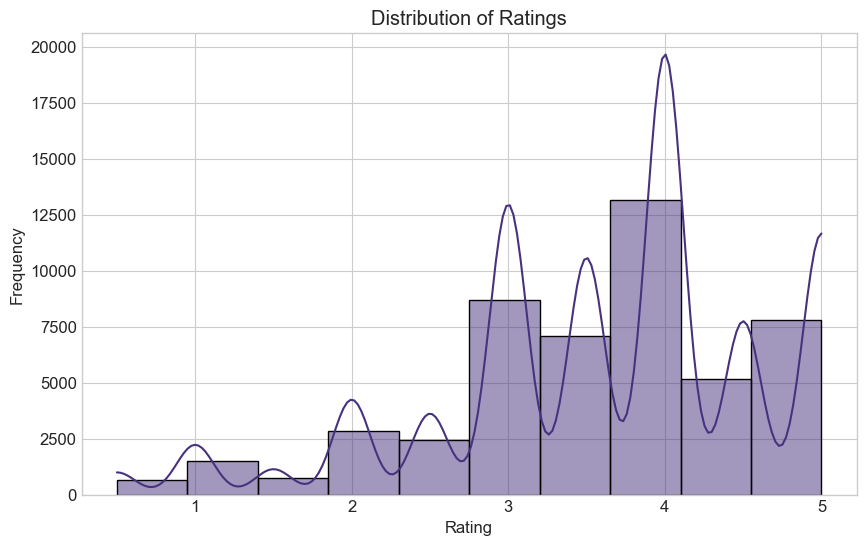

Rating statistics:
count    50000.000000
mean         3.604810
std          1.045505
min          0.500000
25%          3.000000
50%          4.000000
75%          4.500000
max          5.000000
Name: rating, dtype: float64


In [8]:
# Check if 'rating' column exists in the sample data
if 'rating' in sample_data.columns:
    # Plot the distribution of ratings
    plt.figure(figsize=(10, 6))
    sns.histplot(sample_data['rating'], kde=True, bins=10)
    plt.title('Distribution of Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    # Show rating statistics
    print("Rating statistics:")
    print(sample_data['rating'].describe())
else:
    print("'rating' column not found in the dataset")

In [9]:
# Check if 'timestamp' column exists and process it if it does
if 'timestamp' in sample_data.columns:
    # Convert timestamp to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(sample_data['timestamp']):
        try:
            # Try to convert assuming it's a unix timestamp
            sample_data['timestamp_dt'] = pd.to_datetime(sample_data['timestamp'], unit='s')
        except:
            # If that fails, try direct conversion
            try:
                sample_data['timestamp_dt'] = pd.to_datetime(sample_data['timestamp'])
            except:
                print("Could not convert timestamp to datetime. Sample value:", sample_data['timestamp'].iloc[0])
    else:
        sample_data['timestamp_dt'] = sample_data['timestamp']
    
    # If conversion was successful, analyze time patterns
    if 'timestamp_dt' in sample_data.columns:
        # Plot ratings by year
        plt.figure(figsize=(12, 6))
        sample_data['year'] = sample_data['timestamp_dt'].dt.year
        yearly_ratings = sample_data.groupby('year')['rating'].mean()
        yearly_ratings.plot(kind='line', marker='o')
        plt.title('Average Rating by Year')
        plt.xlabel('Year')
        plt.ylabel('Average Rating')
        plt.grid(True)
        plt.show()
else:
    print("'timestamp' column not found in the dataset")

'timestamp' column not found in the dataset


## User Activity Analysis

Let's analyze user activity patterns within our sample data.

Ratings per user statistics:
count     494.000000
mean      101.214575
std       200.246629
min         1.000000
25%        15.000000
50%        35.000000
75%        97.750000
max      2164.000000
Name: count, dtype: float64


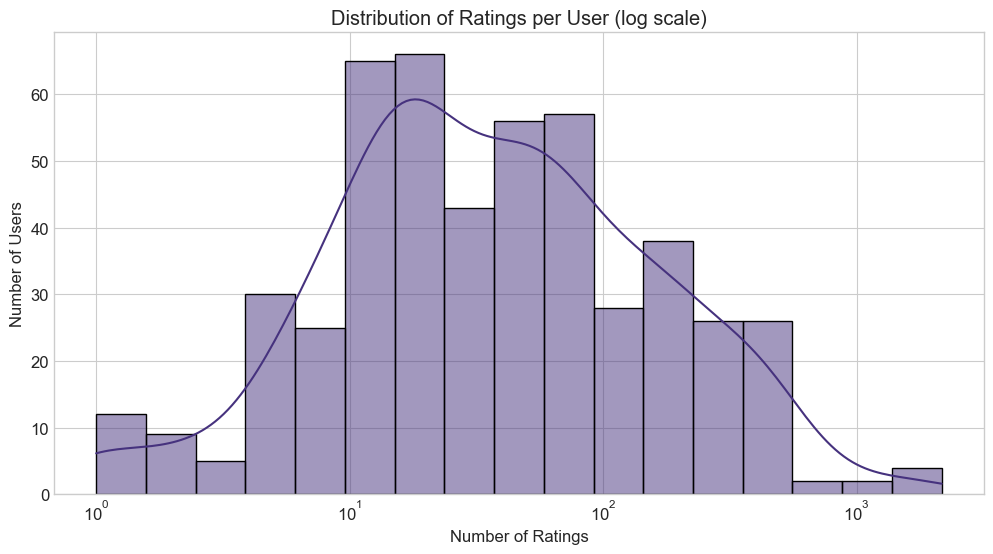


Top 10 most active users:
userId
487    2164
461    1692
149    1507
305    1406
198    1255
227     916
440     728
389     687
224     552
418     551
Name: count, dtype: int64


In [10]:
# Check if 'userId' column exists
if 'userId' in sample_data.columns:
    # Count ratings per user
    user_ratings_count = sample_data['userId'].value_counts()
    
    # Show statistics about ratings per user
    print("Ratings per user statistics:")
    print(user_ratings_count.describe())
    
    # Plot distribution of ratings per user
    plt.figure(figsize=(12, 6))
    sns.histplot(user_ratings_count, kde=True, log_scale=True)
    plt.title('Distribution of Ratings per User (log scale)')
    plt.xlabel('Number of Ratings')
    plt.ylabel('Number of Users')
    plt.grid(True)
    plt.show()
    
    # Show top 10 most active users
    print("\nTop 10 most active users:")
    print(user_ratings_count.head(10))
else:
    print("'userId' column not found in the dataset")

## Movie Popularity Analysis

Let's analyze which movies are most popular and their rating distributions.

Ratings per movie statistics:
count    7900.000000
mean        6.329114
std        12.904797
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       185.000000
Name: count, dtype: float64


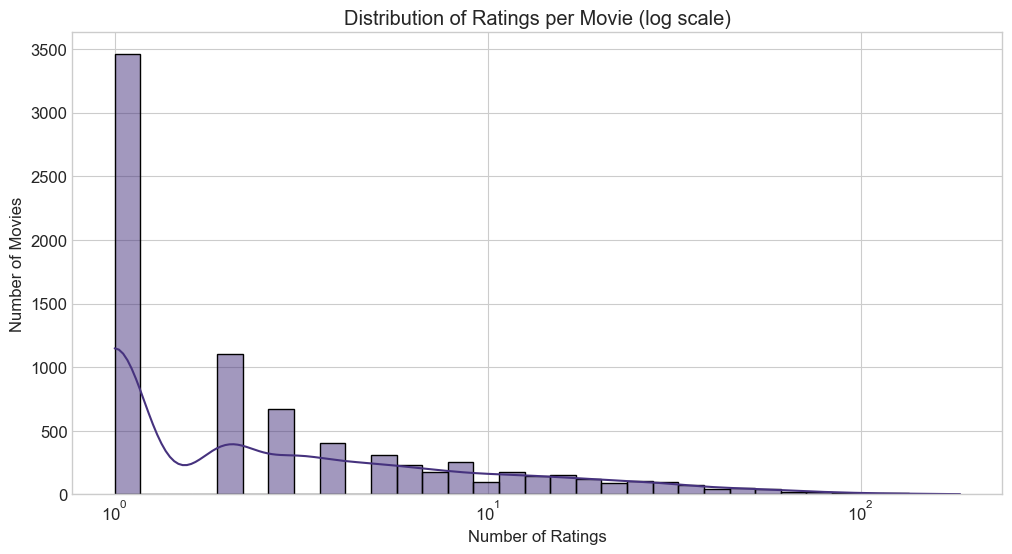


Top 10 most rated movies with average ratings:
   movieId      mean  count
2      318  4.364865    185
3      356  4.083799    179
1      296  4.314706    170
0      260  4.086826    167
7     2571  4.199387    163
5      593  4.059211    152
4      527  4.151724    145
8     4993  4.171329    143
6     1198  4.037313    134
9     7153  4.231343    134

Top 10 most rated movies with titles:
                                               title      mean  count
0                   Shawshank Redemption, The (1994)  4.364865    185
1                                Forrest Gump (1994)  4.083799    179
2                                Pulp Fiction (1994)  4.314706    170
3          Star Wars: Episode IV - A New Hope (1977)  4.086826    167
4                                 Matrix, The (1999)  4.199387    163
5                   Silence of the Lambs, The (1991)  4.059211    152
6                            Schindler's List (1993)  4.151724    145
7  Lord of the Rings: The Fellowship of the R

In [11]:
# Check if 'movieId' column exists
if 'movieId' in sample_data.columns:
    # Count ratings per movie
    movie_ratings_count = sample_data['movieId'].value_counts()
    
    # Show statistics about ratings per movie
    print("Ratings per movie statistics:")
    print(movie_ratings_count.describe())
    
    # Plot distribution of ratings per movie
    plt.figure(figsize=(12, 6))
    sns.histplot(movie_ratings_count, kde=True, log_scale=True)
    plt.title('Distribution of Ratings per Movie (log scale)')
    plt.xlabel('Number of Ratings')
    plt.ylabel('Number of Movies')
    plt.grid(True)
    plt.show()
    
    # Get top 10 most rated movies
    top_movies = movie_ratings_count.head(10).index.tolist()
    
    if 'movieId' in sample_data.columns and 'rating' in sample_data.columns:
        # Get average ratings for top movies
        top_movies_data = sample_data[sample_data['movieId'].isin(top_movies)]
        top_movies_avg = top_movies_data.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()
        top_movies_avg = top_movies_avg.sort_values('count', ascending=False)
        
        # Show top movies with their average ratings
        print("\nTop 10 most rated movies with average ratings:")
        print(top_movies_avg)
        
        # If movie title is available, show that instead of IDs
        if 'title' in sample_data.columns:
            top_movies_info = top_movies_data[['movieId', 'title']].drop_duplicates()
            top_movies_avg = top_movies_avg.merge(top_movies_info, on='movieId')
            print("\nTop 10 most rated movies with titles:")
            print(top_movies_avg[['title', 'mean', 'count']])
else:
    print("'movieId' column not found in the dataset")

## Processing Larger Datasets in Chunks

For datasets too large to fit in memory, we can process them in chunks. Here's how to analyze the entire parquet file without loading it all at once.

In [12]:
# Function to process parquet file in chunks
def process_in_chunks(file_path, chunk_size=100000):
    # Initialize counters and aggregators
    total_rows = 0
    rating_sum = 0
    rating_counts = {}
    
    # Create a ParquetFile object
    pf = pq.ParquetFile(file_path)
    
    # Process the file in chunks
    for batch in pf.iter_batches(batch_size=chunk_size):
        # Convert batch to pandas DataFrame
        chunk_df = batch.to_pandas()
        
        # Count total rows
        batch_rows = len(chunk_df)
        total_rows += batch_rows
        
        # Process ratings if available
        if 'rating' in chunk_df.columns:
            rating_sum += chunk_df['rating'].sum()
            
            # Count rating frequencies
            batch_counts = chunk_df['rating'].value_counts().to_dict()
            for rating, count in batch_counts.items():
                rating_counts[rating] = rating_counts.get(rating, 0) + count
        
        # Print progress
        print(f"Processed {total_rows} rows so far...")
        
        # Optional: Limit the number of chunks for demonstration
        if total_rows >= 500000:  # Process only up to 500k rows for this demo
            break
    
    # Calculate overall statistics
    results = {
        'total_rows': total_rows,
        'average_rating': rating_sum / total_rows if total_rows > 0 else None,
        'rating_distribution': rating_counts
    }
    
    return results

# Run the chunked processing (commented out to avoid running it accidentally)
# You can uncomment and run this if you want to process the entire file
'''
print("Processing the entire parquet file in chunks...")
results = process_in_chunks(parquet_file_path)

# Display results
print(f"\nTotal rows processed: {results['total_rows']}")
print(f"Overall average rating: {results['average_rating']:.2f}")

# Plot rating distribution
plt.figure(figsize=(10, 6))
ratings = list(results['rating_distribution'].keys())
counts = list(results['rating_distribution'].values())

# Sort by rating value
sorted_ratings, sorted_counts = zip(*sorted(zip(ratings, counts)))
plt.bar(sorted_ratings, sorted_counts)
plt.title('Rating Distribution (Entire Dataset)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()
'''

'\nprint("Processing the entire parquet file in chunks...")\nresults = process_in_chunks(parquet_file_path)\n\n# Display results\nprint(f"\nTotal rows processed: {results[\'total_rows\']}")\nprint(f"Overall average rating: {results[\'average_rating\']:.2f}")\n\n# Plot rating distribution\nplt.figure(figsize=(10, 6))\nratings = list(results[\'rating_distribution\'].keys())\ncounts = list(results[\'rating_distribution\'].values())\n\n# Sort by rating value\nsorted_ratings, sorted_counts = zip(*sorted(zip(ratings, counts)))\nplt.bar(sorted_ratings, sorted_counts)\nplt.title(\'Rating Distribution (Entire Dataset)\')\nplt.xlabel(\'Rating\')\nplt.ylabel(\'Count\')\nplt.grid(True)\nplt.show()\n'

## Conclusion

In this notebook, we've explored the user rating data from the parquet file without loading the entire dataset into memory. We've examined:

1. The structure and metadata of the parquet file
2. Basic statistics of a sample of the data
3. Distribution of ratings
4. User activity patterns
5. Movie popularity
6. A method for processing the entire file in chunks

This approach allows us to work with large datasets efficiently, even on machines with limited memory.